<a href="https://colab.research.google.com/github/gunjanvjangra/AIMLMonth2023/blob/main/Implementation_OTT_churn_model_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


      Name                                  Roll No.
1.  Arshita                                  23080
2.  Gunjan Vaishnavi Jangra                  23133
3.  Venkata Shreya Jakkinapalli              23479


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
path = '/content/drive/MyDrive/dataset/ott_churn_model_dataset.csv'
data = pd.read_csv(path)
data

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2020,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2020,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2020,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2020,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2020,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2020,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,2020,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2020,998474,353-2080,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2020,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0


# **EDA**

In [ ]:
data.describe()

,year,customer_id,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
count,2000.0,2000.00000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,1972.000000,2000.000000,1965.000000
mean,2020.0,554887.16250,38.69050,99.750000,270.178425,10.198700,30.620780,100.415500,4.482500,3.250507,1.547000,0.133333
std,0.0,261033.69218,10.20641,39.755386,80.551627,2.785519,9.129165,19.529454,2.487728,0.809084,1.315164,0.340021
min,2020.0,100198.00000,18.00000,1.000000,0.000000,0.000000,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.0,328634.75000,32.00000,73.000000,218.212500,8.400000,24.735000,87.000000,3.000000,3.000000,1.000000,0.000000
50%,2020.0,567957.50000,37.00000,99.000000,269.925000,10.200000,30.590000,101.000000,4.000000,3.000000,1.000000,0.000000
75%,2020.0,773280.25000,44.00000,127.000000,324.675000,12.000000,36.797500,114.000000,6.000000,4.000000,2.000000,0.000000
max,2020.0,999961.00000,82.00000,243.000000,526.200000,20.000000,59.640000,175.000000,19.000000,6.000000,9.000000,1.000000


In [ ]:
data.isna().sum()

year                       0
customer_id                0
phone_no                   0
gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

In [ ]:
data.gender.value_counts()

Male      1053
Female     923
Name: gender, dtype: int64

In [ ]:
data.gender.fillna('other', inplace = True)

In [ ]:
data[data.duplicated()]

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn


In [ ]:
data.maximum_days_inactive.fillna(data.maximum_days_inactive.mode()[0], inplace = True)

In [ ]:
data.churn.fillna(1.0,inplace = True)

In [ ]:
data.replace({'no':0,'yes':1}, inplace = True)

In [ ]:
churned=data[data["churn"]==1]
churned

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
2,Female,65,126,0,0,87.30,11.9,9.89,91,1,4.0,5,1.0
5,other,31,65,0,0,193.65,12.7,21.95,111,6,4.0,4,1.0
7,Female,40,50,0,0,196.65,5.6,22.29,88,9,3.0,5,1.0
18,Male,39,115,0,0,367.50,13.7,41.65,124,8,4.0,1,1.0
22,Female,45,76,0,0,395.10,11.4,44.78,101,5,4.0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1959,Male,29,144,0,0,417.75,11.6,47.35,90,5,4.0,1,1.0
1993,Male,36,127,0,0,303.15,11.5,34.36,113,3,4.0,2,1.0
1994,Female,60,141,0,1,310.35,9.3,35.17,124,11,3.0,2,1.0
1995,Female,54,75,0,1,182.25,11.3,20.66,97,5,4.0,2,1.0


In [ ]:
not_churned=data[data["churn"]==0]
not_churned

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,Female,36,62,0,0,148.35,12.2,16.81,82,1,4.0,1,0.0
1,Female,39,149,0,0,294.45,7.7,33.37,87,3,3.0,2,0.0
3,Female,24,131,0,1,321.30,9.5,36.41,102,4,3.0,3,0.0
4,Female,40,191,0,0,243.00,10.9,27.54,83,7,3.0,1,0.0
6,other,54,59,0,0,239.25,10.2,27.12,106,4,3.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,Male,49,50,1,1,460.65,8.0,52.21,109,3,3.0,0,0.0
1992,Female,42,119,0,1,176.70,7.6,20.03,76,3,3.0,3,0.0
1996,Male,45,127,0,0,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,other,53,94,0,0,128.85,15.6,14.60,110,16,5.0,0,0.0


<ipython-input-15-45c9a88c9fcf>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=churned.corr()


<Axes: >

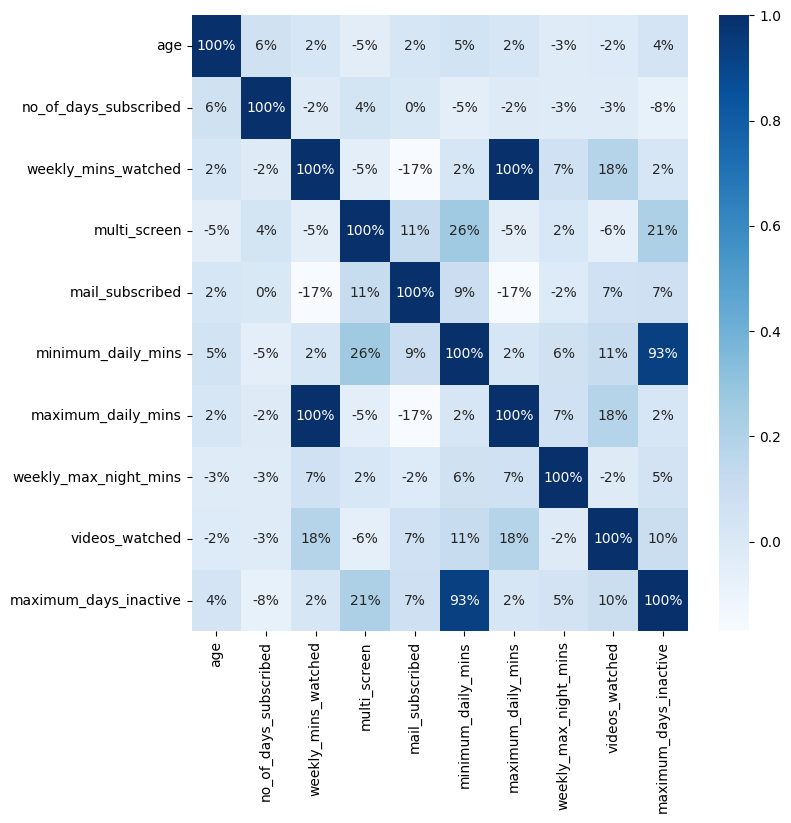

In [ ]:
plt.figure(figsize=(8,8))
corr=churned.corr()
vars=["age","no_of_days_subscribed","weekly_mins_watched","multi_screen","mail_subscribed","minimum_daily_mins","maximum_daily_mins",
      "weekly_max_night_mins","videos_watched","maximum_days_inactive"]
sns.heatmap(corr.loc[vars,vars],annot=True,cmap="Blues",fmt=".0%")
#sns.heatmap(data,annot=True,fmt=".0%")

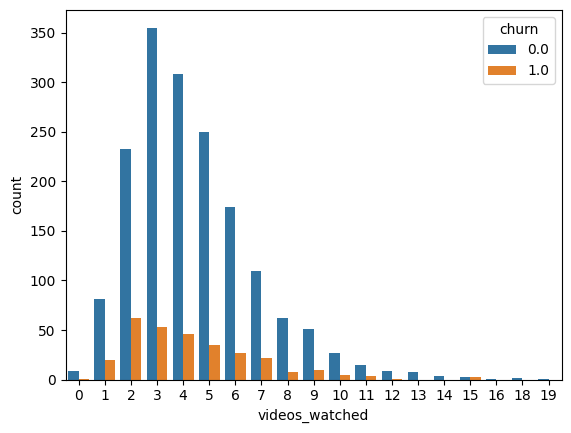

In [ ]:
sns.countplot(data, x='videos_watched',hue='churn')
plt.show()

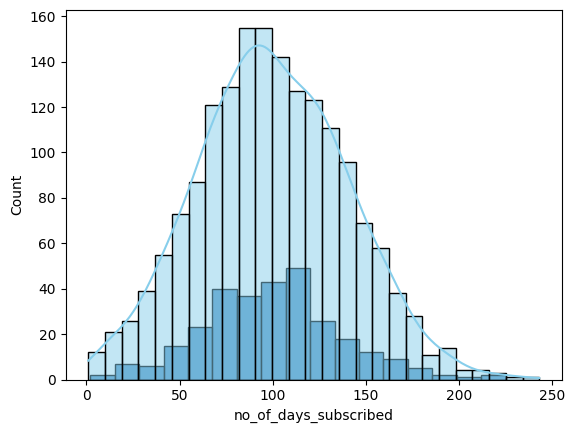

In [ ]:
sns.histplot(churned, x='no_of_days_subscribed')
sns.histplot(not_churned, x='no_of_days_subscribed',color="skyblue",kde=True)
plt.show()

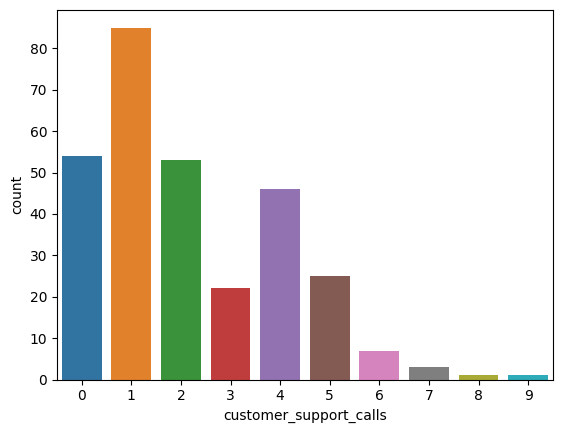

In [ ]:
sns.countplot(churned, x='customer_support_calls')
plt.show()

In [ ]:
gender_data = pd.get_dummies(data.gender)
gender_data

,Female,Male,other
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
1995,1,0,0
1996,0,1,0
1997,0,0,1
1998,0,1,0


In [ ]:
data = pd.concat([data,gender_data], axis = 1)
data

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,Female,Male,other
0,2020,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0,1,0,0
1,2020,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0,1,0,0
2,2020,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0,1,0,0
3,2020,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0,1,0,0
4,2020,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2020,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,1.0,1,0,0
1996,2020,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0,0,1,0
1997,2020,998474,353-2080,other,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0,0,0,1
1998,2020,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,3.0,3,0.0,0,1,0


In [ ]:
data.dtypes

year                        int64
customer_id                 int64
phone_no                   object
gender                     object
age                         int64
no_of_days_subscribed       int64
multi_screen                int64
mail_subscribed             int64
weekly_mins_watched       float64
minimum_daily_mins        float64
maximum_daily_mins        float64
weekly_max_night_mins       int64
videos_watched              int64
maximum_days_inactive     float64
customer_support_calls      int64
churn                     float64
Female                      uint8
Male                        uint8
other                       uint8
dtype: object

In [ ]:
data.drop(['year','phone_no','customer_id'], axis=1, inplace = True)

In [ ]:
for i in range(len(data)):
    age = data.loc[i, 'age']
    if age <= 18:
        data.loc[i, 'age_group'] = 'Under 18'
    elif 19 <= age <= 25:
        data.loc[i, 'age_group'] = '19-25'
    elif 26 <= age <= 35:
        data.loc[i, 'age_group'] = '26-35'
    elif 36 <= age <= 45:
        data.loc[i, 'age_group'] = '36-45'
    elif 46 <= age <= 60:
        data.loc[i, 'age_group'] = '46-60'
    else:
        data.loc[i, 'age_group'] = 'over 60'

In [ ]:
age_group_mapping = {
    'Under 18': 1,
    '19-25': 2,
    '26-35': 3,
    '36-45': 4,
    '46-60': 5,
    'over 60': 6
}

data['age_group_numeric'] = data['age_group'].map(age_group_mapping).astype(float)

% of Respective columns generating churn

In [ ]:
y = data.churn

In [ ]:
X = data.drop(['churn'], axis=1)

In [ ]:
print(X.shape, y.shape)

(2000, 19) (2000,)


In [ ]:
from collections import Counter

In [ ]:
def per_count(x):
    counter=Counter(x)
    pt=[list(counter.keys()),list(counter.values())]
    Count = data.churn.value_counts()
    data2 = pd.DataFrame(np.array(pt).T, columns=['Churn','Count'])
    data2['Count'] = data2['Count'].astype('int64')
    data2['%'] = round(data2['Count'] / x.shape[0] * 100, 2)
    return data2.sort_values('Count',ascending=False)

In [ ]:
per_count(y)

,Churn,Count,%
0,0.0,1703,85.15
1,1.0,297,14.85


In [ ]:
gender_churn= (data.groupby('gender')['churn'].mean())*100

In [ ]:
gender_churn

gender
Female    15.167931
Male      14.719848
other      8.333333
Name: churn, dtype: float64

In [ ]:
data['Female'].value_counts()

0    1077
1     923
Name: Female, dtype: int64

In [ ]:
data['Male'].value_counts()

1    1053
0     947
Name: Male, dtype: int64

In [ ]:
data['other'].value_counts()

0    1976
1      24
Name: other, dtype: int64

In [ ]:
df = data.groupby(['Female','churn'], sort=False).size().reset_index(name='Count')
print (df)

   Female  churn  Count
0       1    0.0    783
1       1    1.0    140
2       0    1.0    157
3       0    0.0    920


In [ ]:
dm = data.groupby(['Male','churn'], sort=False).size().reset_index(name='Count')
print (dm)

   Male  churn  Count
0     0    0.0    805
1     0    1.0    142
2     1    0.0    898
3     1    1.0    155


In [ ]:
do = data.groupby(['other','churn'], sort=False).size().reset_index(name='Count')
print (do)

   other  churn  Count
0      0    0.0   1681
1      0    1.0    295
2      1    1.0      2
3      1    0.0     22


In [ ]:
percent_cf= ((140/923)*100)
print(percent_cf)

15.167930660888407


In [ ]:
percent_cm= ((155/1053)*100)
print(percent_cm)

14.719848053181387


In [ ]:
percent_co= ((2/24)*100)
print(percent_co)

8.333333333333332


In [ ]:
percent_chf= ((140/2000)*100)
print(percent_chf)

7.000000000000001


In [ ]:
percent_chm= ((155/2000)*100)
print(percent_chm)

7.75


In [ ]:
percent_cho= ((2/2000)*100)
print(percent_cho)

0.1


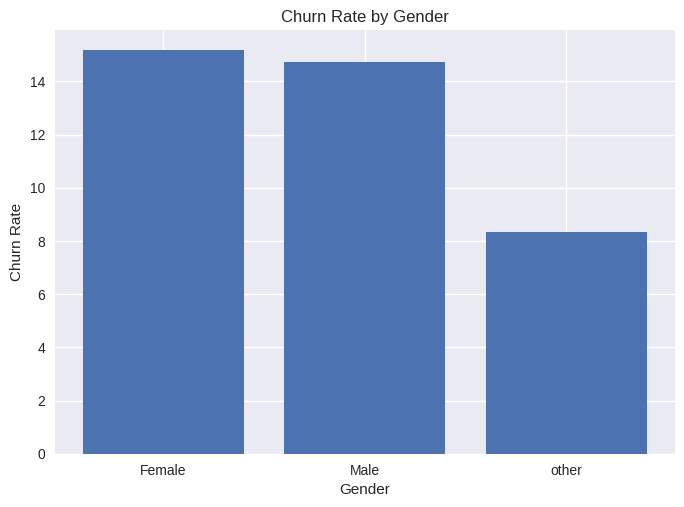

In [ ]:
plt.bar(gender_churn.index, gender_churn.values)
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Gender')
plt.show()

In [ ]:
data.age_group_numeric.value_counts()

4.0    761
3.0    697
5.0    322
2.0    131
6.0     86
1.0      3
Name: age_group_numeric, dtype: int64

In [ ]:
age_churn = (data.groupby('age_group_numeric')['churn'].mean())*100

In [ ]:
age_churn

age_group_numeric
1.0    33.333333
2.0    15.267176
3.0    14.777618
4.0    14.586071
5.0    14.285714
6.0    18.604651
Name: churn, dtype: float64

In [ ]:
dAge = data.groupby(['age_group_numeric','churn'], sort=False).size().reset_index(name='Count')
print (dAge)

    age_group_numeric  churn  Count
0                 4.0    0.0    650
1                 6.0    1.0     16
2                 2.0    0.0    111
3                 3.0    1.0    103
4                 5.0    0.0    276
5                 4.0    1.0    111
6                 6.0    0.0     70
7                 3.0    0.0    594
8                 2.0    1.0     20
9                 5.0    1.0     46
10                1.0    0.0      2
11                1.0    1.0      1


In [ ]:
percent_cAge1= ((1/3)*100)
print(percent_cAge1)

33.33333333333333


In [ ]:
percent_cAge2= ((20/131)*100)
print(percent_cAge1)

33.33333333333333


In [ ]:
percent_cAge3= ((103/697)*100)
print(percent_cAge3)

14.777618364418938


In [ ]:
percent_cAge4= ((111/761)*100)
print(percent_cAge4)

14.586070959264127


In [ ]:
percent_cAge5= ((46/322)*100)
print(percent_cAge5)

14.285714285714285


In [ ]:
percent_cAge6= ((16/86)*100)
print(percent_cAge6)

18.6046511627907


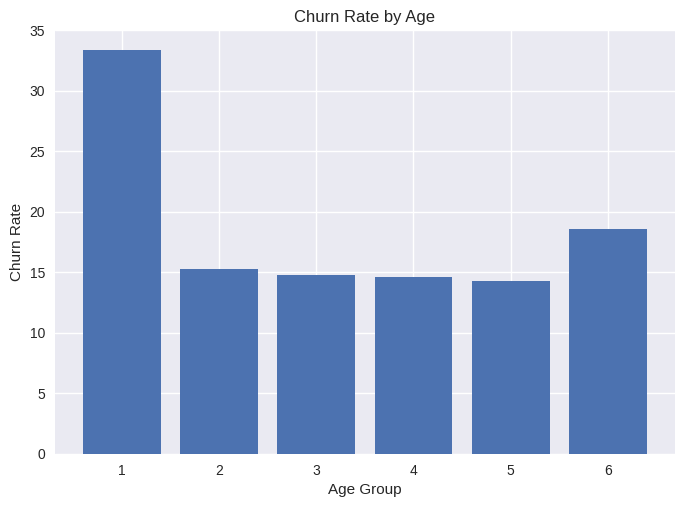

In [ ]:
plt.bar(age_churn.index, age_churn.values)
plt.xlabel('Age Group')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Age')
plt.show()

In [ ]:
data.mail_subscribed.value_counts()

0    1430
1     570
Name: mail_subscribed, dtype: int64

In [ ]:
mail_churn = (data.groupby('mail_subscribed')['churn'].mean())*100

In [ ]:
mail_churn

mail_subscribed
0    16.573427
1    10.526316
Name: churn, dtype: float64

In [ ]:
dMail = data.groupby(['mail_subscribed','churn'], sort=False).size().reset_index(name='Count')
print (dMail)

   mail_subscribed  churn  Count
0                0    0.0   1193
1                0    1.0    237
2                1    0.0    510
3                1    1.0     60


In [ ]:
percent_cMail0= ((237/1430)*100)
print(percent_cMail0)

16.573426573426573


In [ ]:
percent_cMail1= ((60/570)*100)
print(percent_cMail1)

10.526315789473683


In [ ]:
avg_mins = data['minimum_daily_mins'].mean()
avg_mins

10.1987

In [ ]:
avg_max = data['maximum_daily_mins'].mean()
avg_max

30.62078

In [ ]:
sum_column1 = churned['weekly_mins_watched'].sum()
sum_column2 = churned['weekly_max_night_mins'].sum()
rows_churned= len(churned)
print(rows_churned)
tot_sum = sum_column1+sum_column2
print("Total weekly minutes watched by 297 people",tot_sum)

In [ ]:
avg_weekly_churned= ((tot_sum)/rows_churned)
print(avg_weekly_churned)

In [ ]:
threshold = 402.32  # Adjust this threshold value as needed

# Calculate the total time spent by each customer
data['total_time_spent'] = data['weekly_mins_watched'] + data['minimum_daily_mins'] + data['maximum_daily_mins'] + data['weekly_max_night_mins']

# Create two new columns: one for the sum and one for the average of daily and weekly minutes watched
data['total_weekly_mins'] = data['weekly_mins_watched'] + data['weekly_max_night_mins']
data['total_daily_mins'] = data['minimum_daily_mins'] + data['maximum_daily_mins']

# Create a binary column 'time_threshold_exceeded' based on the threshold
data['time_threshold_exceeded'] = (data['total_time_spent'] > threshold).astype(int)


In [ ]:
mean_videos_watched = data['videos_watched'].mean()

print("Mean Number of Videos Watched:", mean_videos_watched)

Mean Number of Videos Watched: 4.4825


In [ ]:
data.maximum_days_inactive.value_counts()

3.0    973
4.0    645
2.0    273
5.0     85
1.0     12
0.0     10
6.0      2
Name: maximum_days_inactive, dtype: int64

In [ ]:
crosstab = pd.crosstab(data['time_threshold_exceeded'], data['churn'])
print(crosstab)

churn                    0.0  1.0
time_threshold_exceeded          
0                        803  113
1                        900  184


In [ ]:
inactive_churn = (data.groupby('maximum_days_inactive')['churn'].mean())*100
inactive_churn

maximum_days_inactive
0.0    10.000000
1.0     8.333333
2.0    12.087912
3.0    14.594039
4.0    16.124031
5.0    17.647059
6.0    50.000000
Name: churn, dtype: float64

In [ ]:
dInactive = data.groupby(['maximum_days_inactive','churn'], sort=False).size().reset_index(name='Count')
print (dInactive)

    maximum_days_inactive  churn  Count
0                     4.0    0.0    541
1                     3.0    0.0    831
2                     4.0    1.0    104
3                     3.0    1.0    142
4                     2.0    0.0    240
5                     5.0    0.0     70
6                     2.0    1.0     33
7                     1.0    0.0     11
8                     0.0    0.0      9
9                     5.0    1.0     15
10                    0.0    1.0      1
11                    6.0    0.0      1
12                    6.0    1.0      1
13                    1.0    1.0      1


In [ ]:
data['engagement_score'] = data['weekly_mins_watched'] + data['minimum_daily_mins']

# Define thresholds for categorizing engagement levels
high_engagement_threshold = 300  # Adjust this threshold based on your dataset
low_engagement_threshold = 100    # Adjust this threshold based on your dataset

# Categorize users based on engagement levels
data['engagement_segment'] = np.where(data['engagement_score'] >= high_engagement_threshold, 'High Engagement', 'Low Engagement')
data['engagement_segment'] = np.where(data['engagement_score'] <= low_engagement_threshold, 'Low Engagement', data['engagement_segment'])

# Calculate churn rates within each engagement segment
engagement_churn_rates = (data.groupby('engagement_segment')['churn'].mean())*100

# Print the results
print("Engagement Segment Churn Rates:")
print(engagement_churn_rates)

Engagement Segment Churn Rates:
engagement_segment
High Engagement    19.268293
Low Engagement     11.779661
Name: churn, dtype: float64


In [ ]:
data.replace({'Low Engagement':0,'High Engagement':1}, inplace = True)

In [ ]:
churned_with_calls = data[(data['churn'] == 1) & (data['customer_support_calls'] > 0)]
num_churned_with_calls = len(churned_with_calls)
num_churned_with_calls

243

In [ ]:
data.drop('gender', axis=1, inplace = True)

In [ ]:
data.drop('age_group', axis=1, inplace = True)

In [ ]:
X = data.drop('churn', axis = 1)

In [ ]:
Y = data.churn

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
X_res, Y_res = SMOTE().fit_resample(X,Y)

In [ ]:
X_res.value_counts()

year  customer_id  age  no_of_days_subscribed  multi_screen  mail_subscribed  weekly_mins_watched  minimum_daily_mins  maximum_daily_mins  weekly_max_night_mins  videos_watched  maximum_days_inactive  customer_support_calls  Female  Male  other  age_group_numeric  total_time_spent  total_weekly_mins  total_daily_mins  time_threshold_exceeded  engagement_score  engagement_segment
2020  100198       36   62                     0             0                148.350000           12.200000           16.810000           82                     1               4.000000               1                       1       0     0      4.000000           259.360000        230.350000         29.010000         1                        160.550000        0                     1
      681405       34   102                    0             0                399.904520           12.227068           45.322307           124                    4               4.117795               0                       0     

In [ ]:
Y_res.value_counts()

0.0    1703
1.0    1703
Name: churn, dtype: int64

# **DATA PRE-PROCESSING**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test, Y_train, Y_test = train_test_split(X_res,Y_res,test_size = 0.2)

In [ ]:
X_train

,year,customer_id,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,...,Female,Male,other,age_group_numeric,total_time_spent,total_weekly_mins,total_daily_mins,time_threshold_exceeded,engagement_score,engagement_segment
1652,2020,847176,36,163,0,1,240.000000,10.400000,27.200000,118,...,0,1,0,4.000000,395.600000,358.000000,37.600000,1,250.400000,0
631,2020,387332,22,87,0,0,204.450000,7.100000,23.170000,101,...,1,0,0,2.000000,335.720000,305.450000,30.270000,1,211.550000,0
1019,2020,576764,44,82,0,0,215.850000,11.100000,24.460000,94,...,0,1,0,4.000000,345.410000,309.850000,35.560000,1,226.950000,0
1062,2020,594571,46,135,0,1,302.100000,12.900000,34.240000,131,...,0,1,0,5.000000,480.240000,433.100000,47.140000,1,315.000000,1
1696,2020,864189,32,65,0,0,230.850000,8.500000,26.160000,147,...,0,1,0,3.000000,412.510000,377.850000,34.660000,1,239.350000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,2020,258463,39,120,0,0,298.200000,9.900000,33.800000,81,...,0,1,0,4.000000,422.900000,379.200000,43.700000,1,308.100000,1
972,2020,556880,36,123,0,0,310.350000,8.300000,35.170000,60,...,0,1,0,4.000000,413.820000,370.350000,43.470000,1,318.650000,1
2638,2020,270960,43,130,0,0,368.210189,10.647645,41.732226,77,...,0,1,0,4.607334,498.328282,445.948412,52.379871,1,378.857833,0
2904,2020,290834,43,107,0,0,208.821985,11.896017,23.667313,81,...,1,0,0,4.205451,326.192439,290.629108,35.563331,1,220.718002,0


In [ ]:
X_test

,year,customer_id,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,...,Female,Male,other,age_group_numeric,total_time_spent,total_weekly_mins,total_daily_mins,time_threshold_exceeded,engagement_score,engagement_segment
2049,2020,253192,35,76,0,0,407.728637,7.722161,46.210273,105,...,0,1,0,3.993075,566.785728,512.853294,53.932434,1,415.450798,0
554,2020,352228,22,173,0,1,348.600000,5.000000,39.510000,102,...,0,1,0,2.000000,495.110000,450.600000,44.510000,1,353.600000,1
1523,2020,785175,31,64,1,0,520.200000,13.300000,58.960000,102,...,0,1,0,3.000000,694.460000,622.200000,72.260000,1,533.500000,1
2273,2020,337357,48,99,0,0,211.662011,12.185106,23.986606,105,...,0,0,0,4.490375,353.001912,316.830199,36.171713,1,223.847117,0
2841,2020,659004,42,93,0,0,387.676770,11.248386,43.936043,99,...,1,0,0,4.257238,542.287155,487.102726,55.184429,1,398.925156,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,2020,131549,39,163,0,0,183.600000,12.500000,20.810000,97,...,0,0,1,4.000000,313.910000,280.600000,33.310000,1,196.100000,0
1315,2020,700734,58,90,0,1,225.150000,5.800000,25.520000,97,...,1,0,0,5.000000,353.470000,322.150000,31.320000,1,230.950000,0
3086,2020,272006,47,129,0,0,384.673960,10.803533,43.597864,80,...,0,0,0,5.000000,519.663685,465.262287,54.401398,1,395.477493,1
1997,2020,998474,53,94,0,0,128.850000,15.600000,14.600000,110,...,0,0,1,5.000000,269.050000,238.850000,30.200000,1,144.450000,0


In [ ]:
Y_train

1652    0.0
631     0.0
1019    0.0
1062    1.0
1696    0.0
       ... 
359     0.0
972     0.0
2638    1.0
2904    1.0
2897    1.0
Name: churn, Length: 2724, dtype: float64

In [ ]:
Y_test

2049    1.0
554     0.0
1523    1.0
2273    1.0
2841    1.0
       ... 
88      0.0
1315    0.0
3086    1.0
1997    0.0
600     0.0
Name: churn, Length: 682, dtype: float64

# **LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model1 = LogisticRegression()
model1

LogisticRegression()

In [ ]:
model1.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
y_pred=model1.predict(X_test)

In [ ]:
pred_prob1 = model1.predict_proba(X_test)

In [ ]:
model1.score(X_test, Y_test)

0.6099706744868035

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(Y_test,y_pred)

0.6099706744868035

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
precision_score(Y_test,y_pred)

0.6023391812865497

In [ ]:
recall_score(Y_test,y_pred)

0.6130952380952381

In [ ]:
f1_lr = f1_score(Y_test, y_pred)
f1_lr

0.6076696165191741

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test,y_pred)
cnf_matrix

array([[210, 136],
       [130, 206]])

Text(0.5, 489.55555555555554, 'Predicted label')

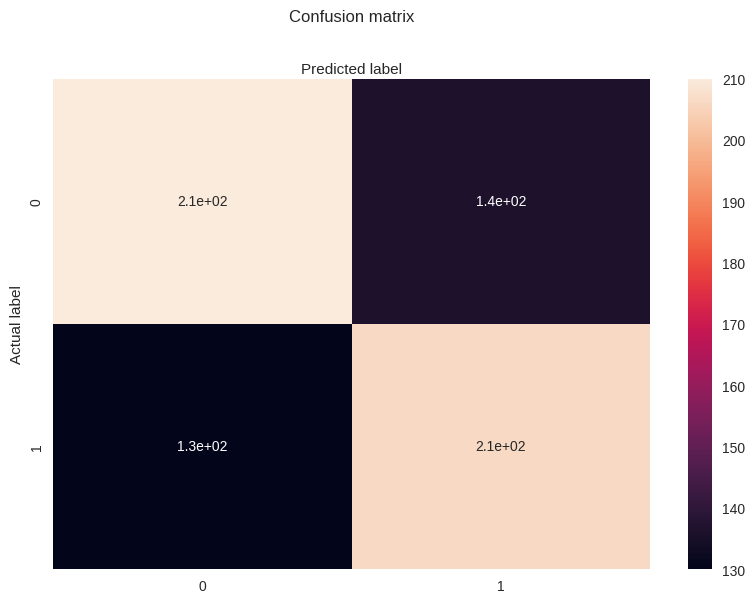

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test,y_pred)
cnf_matrix

array([[210, 136],
       [130, 206]])

# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [ ]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
knn.score(X_test, Y_test)


0.6686217008797654

In [ ]:
y_pred=knn.predict(X_test)

In [ ]:
accuracy_score(Y_test,y_pred)

0.6686217008797654

In [ ]:
precision_score(Y_test,y_pred)

0.65625

In [ ]:
recall_score(Y_test,y_pred)

0.6875

In [ ]:
f1_knn = f1_score(Y_test, y_pred)
f1_knn

0.6715116279069767

In [ ]:
pred_prob2 = knn.predict_proba(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
cm

array([[225, 121],
       [105, 231]])

Text(58.222222222222214, 0.5, 'Truth')

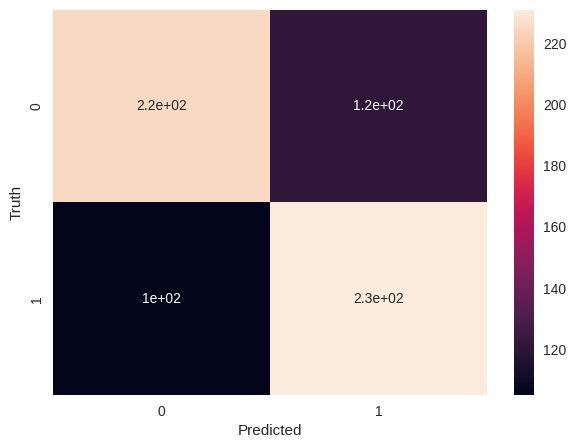

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.68      0.65      0.67       346
         1.0       0.66      0.69      0.67       336

    accuracy                           0.67       682
   macro avg       0.67      0.67      0.67       682
weighted avg       0.67      0.67      0.67       682



#**DECISION TREES**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
decision_model = DecisionTreeClassifier()
decision_model

DecisionTreeClassifier()

In [ ]:
decision_model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=decision_model.predict(X_test)

In [ ]:
pred_prob3 = decision_model.predict_proba(X_test)

In [ ]:
decision_model.score(X_test,Y_test)

0.8049853372434017

In [ ]:
accuracy_score(Y_test,y_pred)

0.8049853372434017

In [ ]:
precision_score(Y_test,y_pred)

0.7959183673469388

In [ ]:
recall_score(Y_test,y_pred)

0.8125

In [ ]:
f1_dt = f1_score(Y_test, y_pred)
f1_dt

0.8041237113402061

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test,y_pred)
cnf_matrix

array([[276,  70],
       [ 63, 273]])

Text(0.5, 489.55555555555554, 'Predicted label')

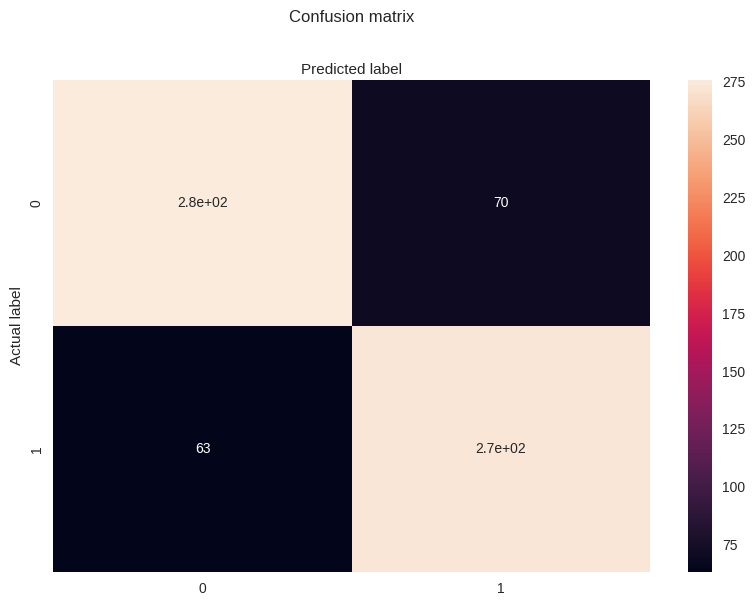

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# **RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_model = RandomForestClassifier()
random_model

RandomForestClassifier()

In [ ]:
random_model.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
y_pred=random_model.predict(X_test)

In [ ]:
random_model.score(X_test, Y_test)

0.9105571847507331

In [ ]:
accuracy_score(Y_test,y_pred)

0.9105571847507331

In [ ]:
precision_score(Y_test,y_pred)

0.9337539432176656

In [ ]:
recall_score(Y_test,y_pred)

0.8809523809523809

In [ ]:
f1_rf = f1_score(Y_test, y_pred)
f1_rf

0.906584992343032

In [ ]:
pred_prob4 = random_model.predict_proba(X_test)

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test,y_pred)
cnf_matrix

array([[325,  21],
       [ 40, 296]])

Text(0.5, 489.55555555555554, 'Predicted label')

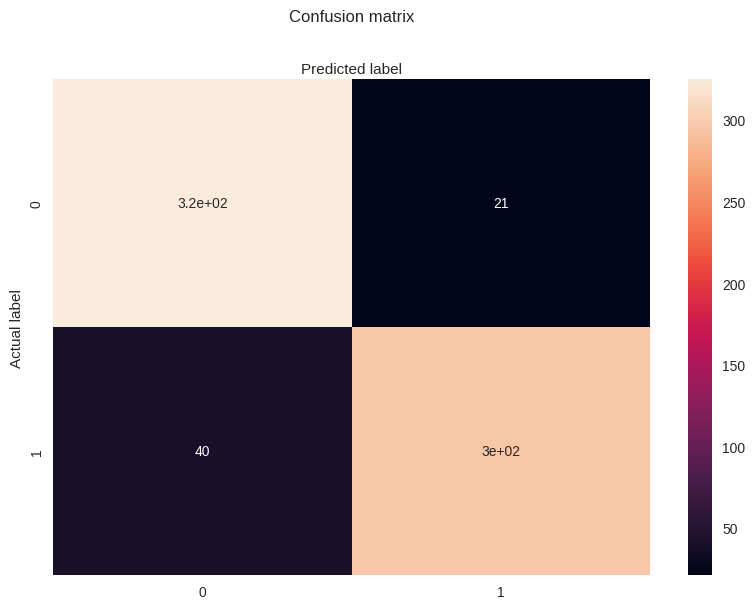

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# **BAGGING AND BOOSTING**

In [ ]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier

In [ ]:
bagging_model = BaggingClassifier()
bagging_model

BaggingClassifier()

In [ ]:
bagging_model.fit(X_train, Y_train)

BaggingClassifier()

In [ ]:
y_pred=bagging_model.predict(X_test)

In [ ]:
pred_prob5 = bagging_model.predict_proba(X_test)

In [ ]:
bagging_model.score(X_test,Y_test)

0.8900293255131965

In [ ]:
accuracy_score(Y_test,y_pred)

0.8900293255131965

In [ ]:
precision_score(Y_test,y_pred)

0.9040247678018576

In [ ]:
recall_score(Y_test,y_pred)

0.8690476190476191

In [ ]:
f1_bb = f1_score(Y_test, y_pred)
f1_bb

0.8861911987860394

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test,y_pred)
cnf_matrix

array([[315,  31],
       [ 44, 292]])

Text(0.5, 489.55555555555554, 'Predicted label')

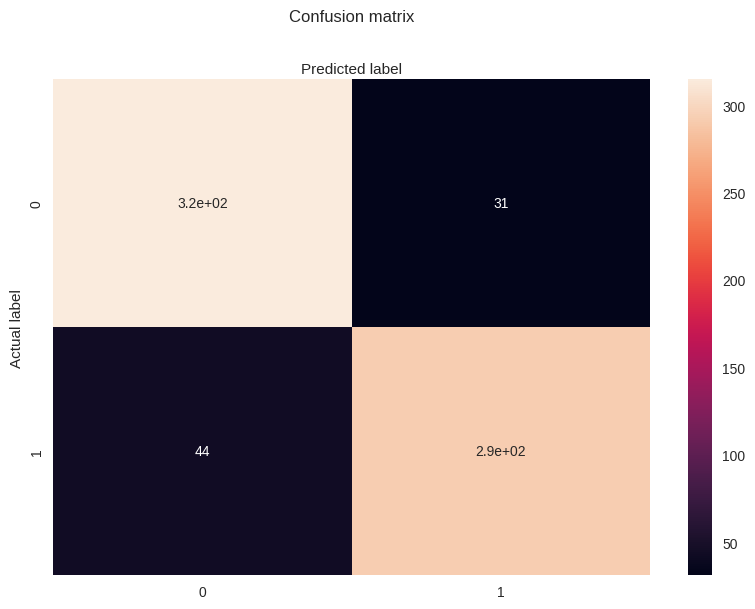

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# **NAIVE BAYES**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
model_6= GaussianNB()

In [ ]:
model_6.fit(X_train,Y_train)

GaussianNB()

In [ ]:
predict_train=model_6.predict(X_test)
predict_train

array([1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0.,
       1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
       0., 0., 0., 0., 0.

In [ ]:
pred_prob6= model_6.predict_proba(X_test)

In [ ]:
model_6.score(X_test,Y_test)

0.593841642228739

In [ ]:
precision_score(Y_test,predict_train)

0.6035087719298246

In [ ]:
trainaccuracy = accuracy_score(Y_test,predict_train)
print('accuracy score',trainaccuracy)

accuracy score 0.593841642228739


In [ ]:
recall_score(Y_test,predict_train)

0.5119047619047619

In [ ]:
from sklearn import metrics
confusion = metrics.confusion_matrix(Y_test,predict_train)
print(confusion)

[[233 113]
 [164 172]]


In [ ]:
TP=confusion[1,1] #true positive
TN=confusion[0,0] #true negatives
FP=confusion[0,1] #false positives
FN=confusion[1,0] #false negatives

Text(0.5, 489.55555555555554, 'Predicted label')

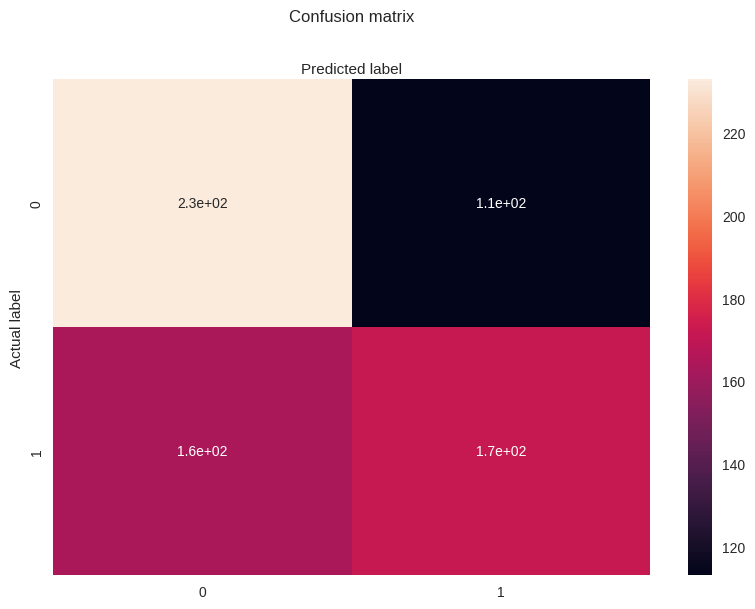

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion), annot=True)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
final_data = pd.DataFrame({'Models': ['Logistic Regression', 'KNN', 'Decision Trees', 'Random Forest', 'Bagging & Boosting', 'Naive Bayes'],
                           'Score': [model1.score(X_test, Y_test),knn.score(X_test, Y_test),decision_model.score(X_test, Y_test),random_model.score(X_test, Y_test),bagging_model.score(X_test, Y_test),accuracy_score(Y_test,predict_train)]})

In [ ]:
final_data

,Models,Score
0,Logistic Regression,0.609971
1,KNN,0.668622
2,Decision Trees,0.804985
3,Random Forest,0.910557
4,Bagging & Boosting,0.890029
5,Naive Bayes,0.593842


##From this we conclude that **Random** **forest** generates score of highest accuracy.

In [ ]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(Y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(Y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(Y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(Y_test, pred_prob4[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(Y_test, pred_prob5[:,1], pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(Y_test, pred_prob6[:,1], pos_label=1)


# roc curve for tpr = fpr
random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)

In [ ]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(Y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(Y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(Y_test, pred_prob3[:,1])
auc_score4 = roc_auc_score(Y_test, pred_prob4[:,1])
auc_score5 = roc_auc_score(Y_test, pred_prob5[:,1])
auc_score6 = roc_auc_score(Y_test, pred_prob6[:,1])
print(auc_score1, auc_score2, auc_score3, auc_score4, auc_score5, auc_score6)

0.6499449490778971 0.7253131021194605 0.8050939306358381 0.9657006950178915 0.9507509289843106 0.6606712771813927


<ipython-input-522-029e0da9a565>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


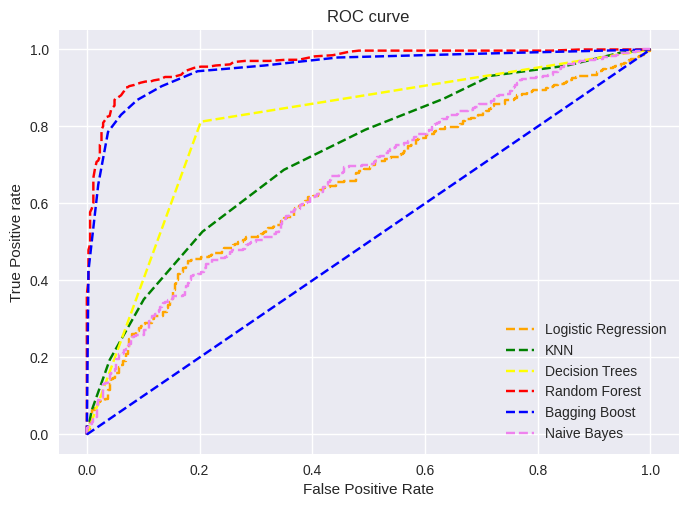

In [ ]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='Decision Trees')
plt.plot(fpr4, tpr4, linestyle='--',color='red', label='Random Forest')
plt.plot(fpr5, tpr5, linestyle='--',color='blue', label='Bagging Boost')
plt.plot(fpr6, tpr6, linestyle='--',color='violet', label='Naive Bayes')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

precision-recall curve

In [ ]:
from sklearn.metrics import precision_recall_curve

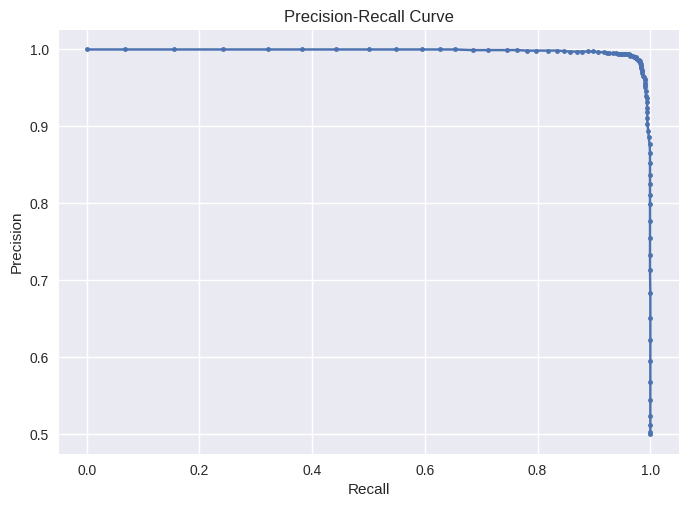

In [ ]:
pred_prob_res = random_model.predict_proba(X_res)[:, 1]
precision, recall, thresholds = precision_recall_curve(Y_res, pred_prob_res)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [ ]:
threshold = 0.99 # Example threshold, adjust based on your needs

# Classify customers based on the threshold
predicted_classes = (pred_prob_res >= threshold).astype(int)

In [ ]:
predicted_classes

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
num_potential_churners = sum(predicted_classes)
print("Number of potential churners:", num_potential_churners)

Number of potential churners: 292


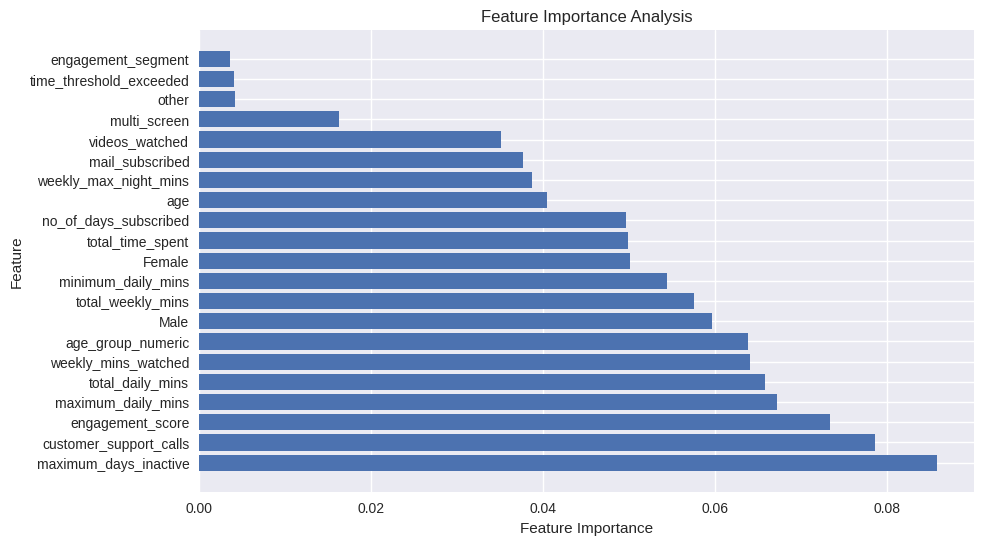

In [ ]:
# Get feature importance scores
feature_importances = random_model.feature_importances_

# Create a DataFrame to store feature names and importance scores
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Analysis')
plt.show()